- Data processing
- Feature Engineering
- Model implementation
- Analysis evaluation
- instruction

# Machine Learning - Assignment 1

> Hoang Dang - s3927234

> This notebook will guide you through a series of steps in solving a real world problem with the application of Machine Learning. We will begin by `data processing`, then `implementing the chosen models`, and lastly `performing analysis and evaluation`.

> Thêm Table of Content?

---

## Questions

- How to handle noises? Do we need to handle noises in both attributes and target variable?
- How to use correlation with categorical data? (The `status` column and many other columns are categorical, which is not good for correlation)
- What loss function should I use for Binary Classification?
- Outliers?
  - Use box diagram to identify
  - What to do with them?
- How to be in top 5%?
- Should I remove duplicated records?
- Tại sao khi set training size là 0.0001 và test là 0.9999 mà kết quả vẫn khá đúng?
- Tại sao khi bỏ ExtraMedTest và ExtraAlcoholTest thì accuracy giảm nhiều vậy
- Why Training Data and Testing Data are so alike to each other?
- Besides from DecisionTreeClassifier, Logistic Regression, RandomForestClassification
  - RandomForestClassification seems to be the best
  - What other models can I use?
  - Can I use other libraries?

## Data Processing

We begin by importing necessary libraries

In [1]:
import pandas as pd  # for data manipulation and analysis
import numpy as np  # for numerical computing
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for data visualization

We then load the training data in `data_train.csv` into `health_data` variable. In here, we tell Pandas that the `Id` column will be used as the `index_col` (For indexing purpose only). After that, we use the `.shape` and `.describe` functions to get some insight of the dataset and each column in it

In [2]:
health_data = pd.read_csv("data_train.csv", delimiter=",", index_col="Id")
print(health_data.shape)  # get the size of the DataFrame
health_data.describe()  # get some insight of each column of the dataset

(202944, 24)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,...,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,0.428700,0.424344,0.962655,28.379824,0.442634,0.040844,0.094391,0.756302,0.635372,0.811519,...,3.196971,4.256455,0.168707,0.439545,8.037449,5.050245,6.055641,-7.408660,-7.560041,0.175571
std,0.494891,0.494244,0.189607,6.612738,0.496700,0.197929,0.292372,0.429313,0.481327,0.391096,...,7.427247,8.736665,0.374494,0.496333,3.051568,0.985601,2.070140,75.993743,75.927137,0.380455
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-55.000000,-55.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,40.000000,40.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000,1.000000


Based on the output, we can see that:
- Our dataset has in total 202,944 rows (records) and 24 columns (23 of which are attributes and the `Status` column as the expected output)
- There are **no missing values** in the dataset since all columns have exactly 202,944 rows


Besides that, we can also use the `.info` method to see a list of all columns with their corresonding data types as indicated below. We can see that all fields are of type `int64` and has 202,944 non-null records

In [3]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202944 entries, 0 to 202943
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                202944 non-null  int64
 1   HighChol              202944 non-null  int64
 2   CholCheck             202944 non-null  int64
 3   BMI                   202944 non-null  int64
 4   Smoker                202944 non-null  int64
 5   Stroke                202944 non-null  int64
 6   HeartDiseaseorAttack  202944 non-null  int64
 7   PhysActivity          202944 non-null  int64
 8   Fruits                202944 non-null  int64
 9   Veggies               202944 non-null  int64
 10  HvyAlcoholConsump     202944 non-null  int64
 11  AnyHealthcare         202944 non-null  int64
 12  NoDocbcCost           202944 non-null  int64
 13  GenHlth               202944 non-null  int64
 14  MentHlth              202944 non-null  int64
 15  PhysHlth              202944 non-null  

In addition to features provided by Pandas, we can also use `Matplotlib` and `Seaborn` to visualize different attributes in the dataset. We will begin by plotting the `histogram` charts to see the data distribution of each attribute

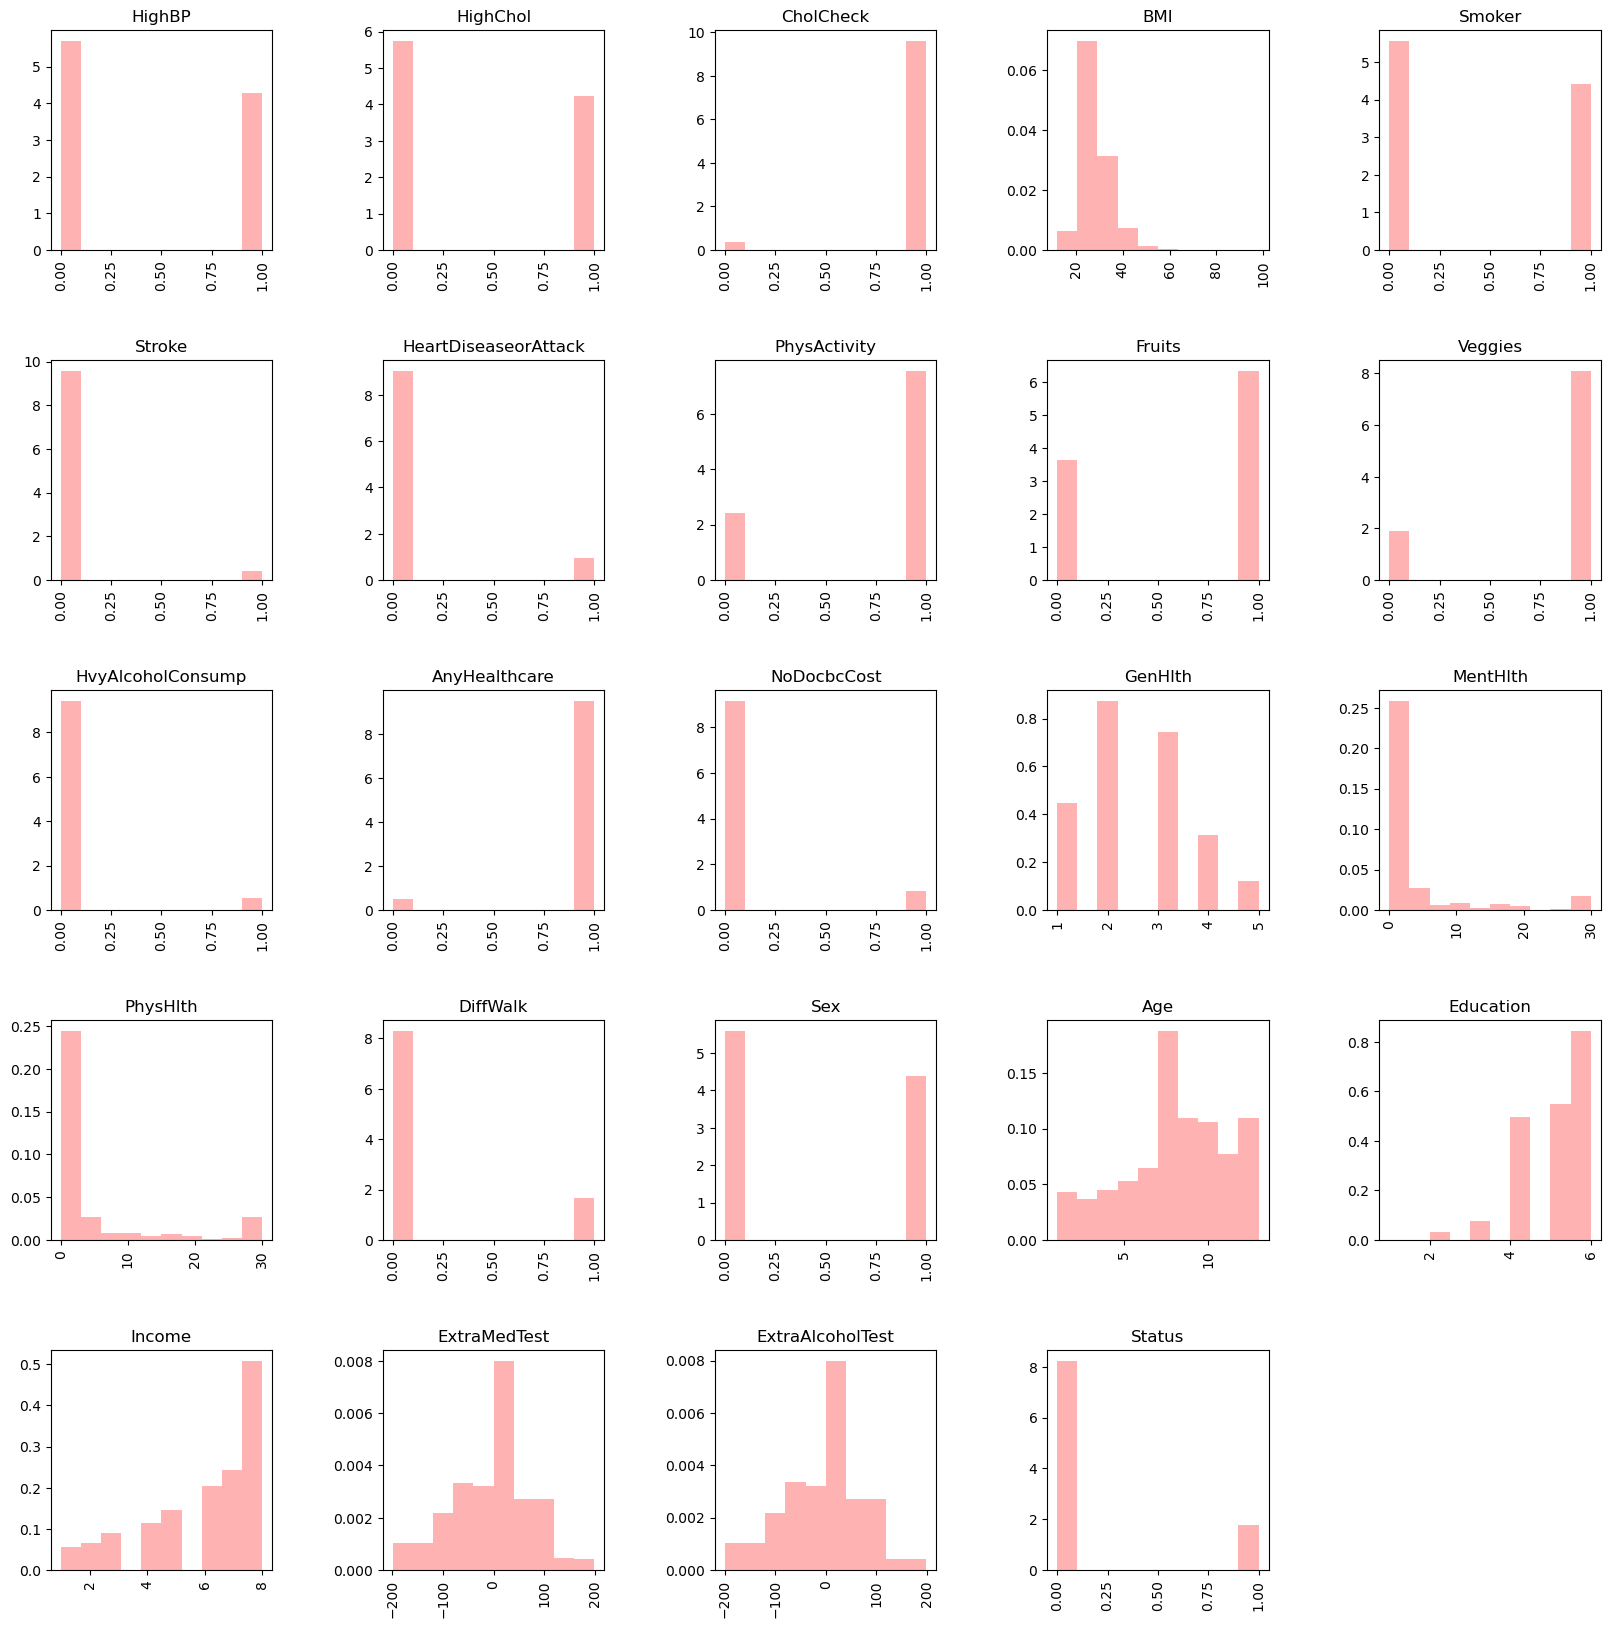

In [4]:
# create a figure to hold different subplots
plt.figure(figsize=(20,20))

# iterate through each column in health_data and plot a corresponding histogram
for i, col in enumerate(health_data.columns):
    plt.subplot(5,5,i+1)
    plt.hist(health_data[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

# adding space between each subplot
plt.subplots_adjust(wspace=0.5, hspace=0.5)

We can also use `Box plot` to visualize our data

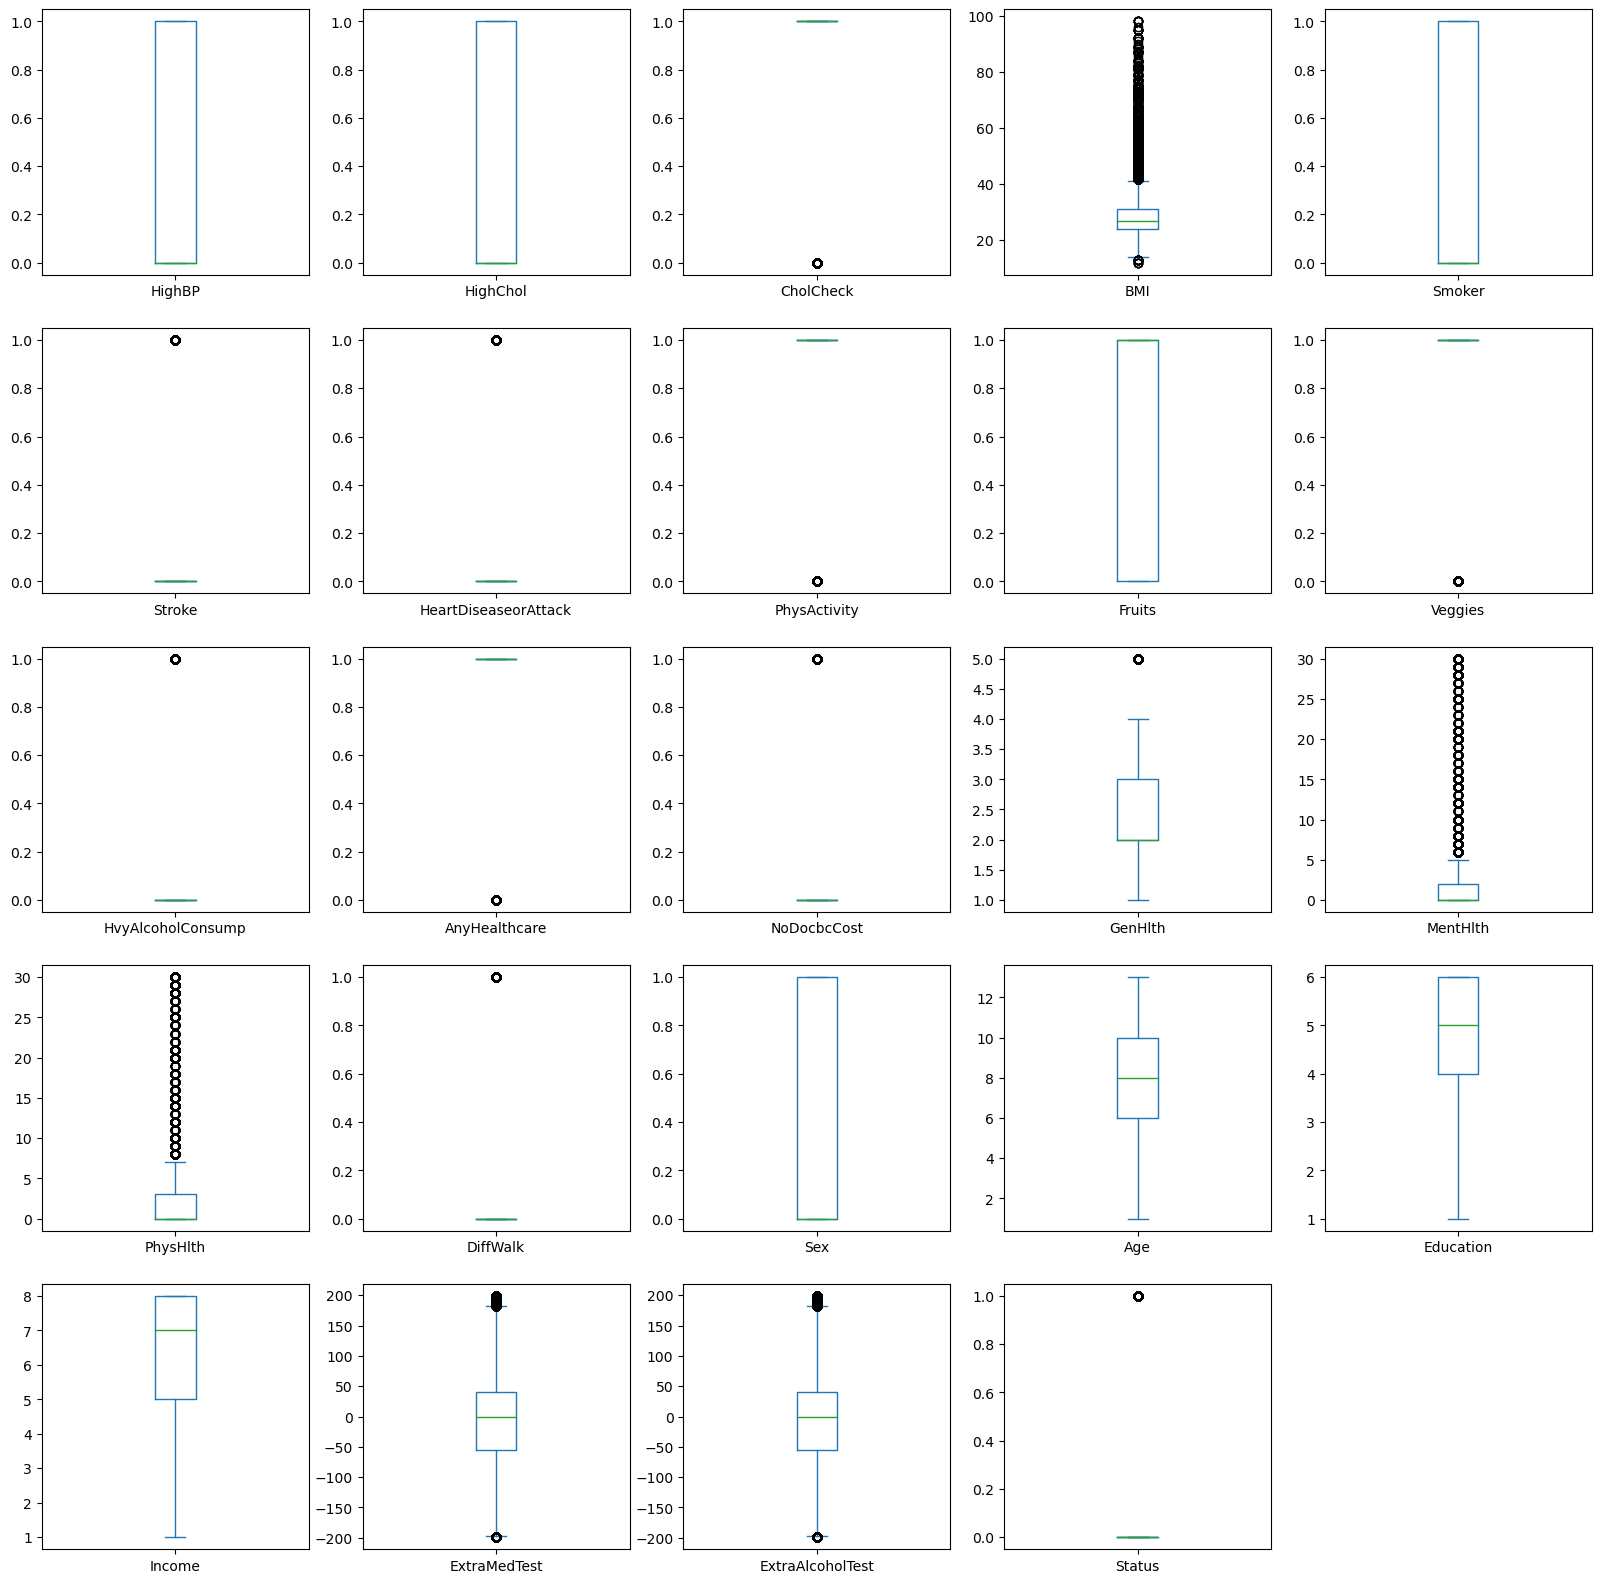

In [5]:
health_data.plot(kind='box', subplots=True, layout=(5, 5), sharex=False, sharey=False, figsize=(20, 20))
plt.show()

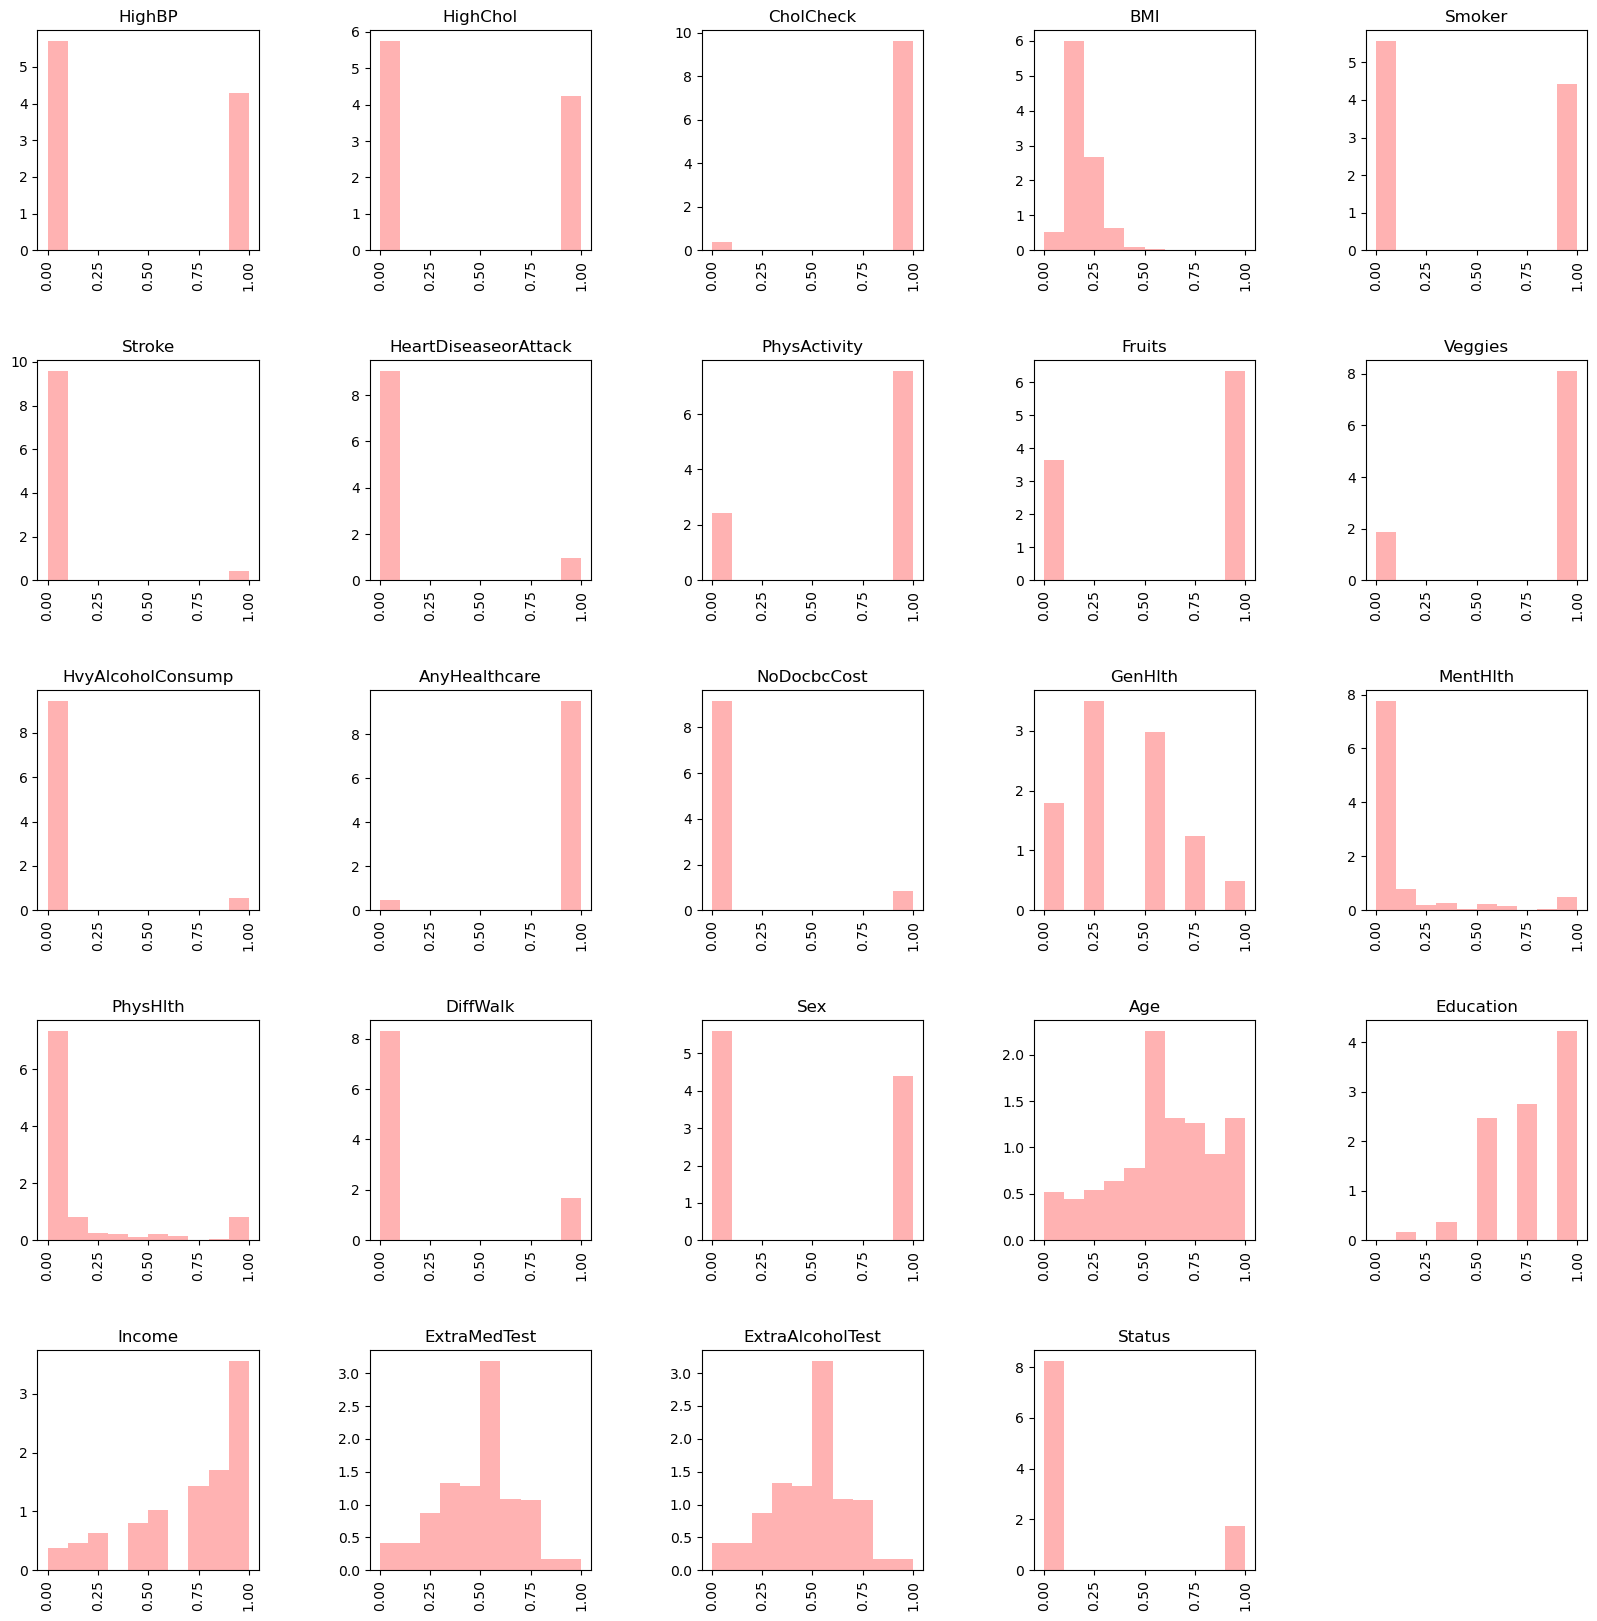

In [29]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income", "ExtraMedTest", "ExtraAlcoholTest"]

scaler = MinMaxScaler()

health_data[numerical_cols] = scaler.fit_transform(health_data[numerical_cols])

# create a figure to hold different subplots
plt.figure(figsize=(20,20))

# iterate through each column in health_data and plot a corresponding histogram
for i, col in enumerate(health_data.columns):
    plt.subplot(5,5,i+1)
    plt.hist(health_data[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

# adding space between each subplot
plt.subplots_adjust(wspace=0.5, hspace=0.5)

<Axes: title={'center': 'Correlation graph'}>

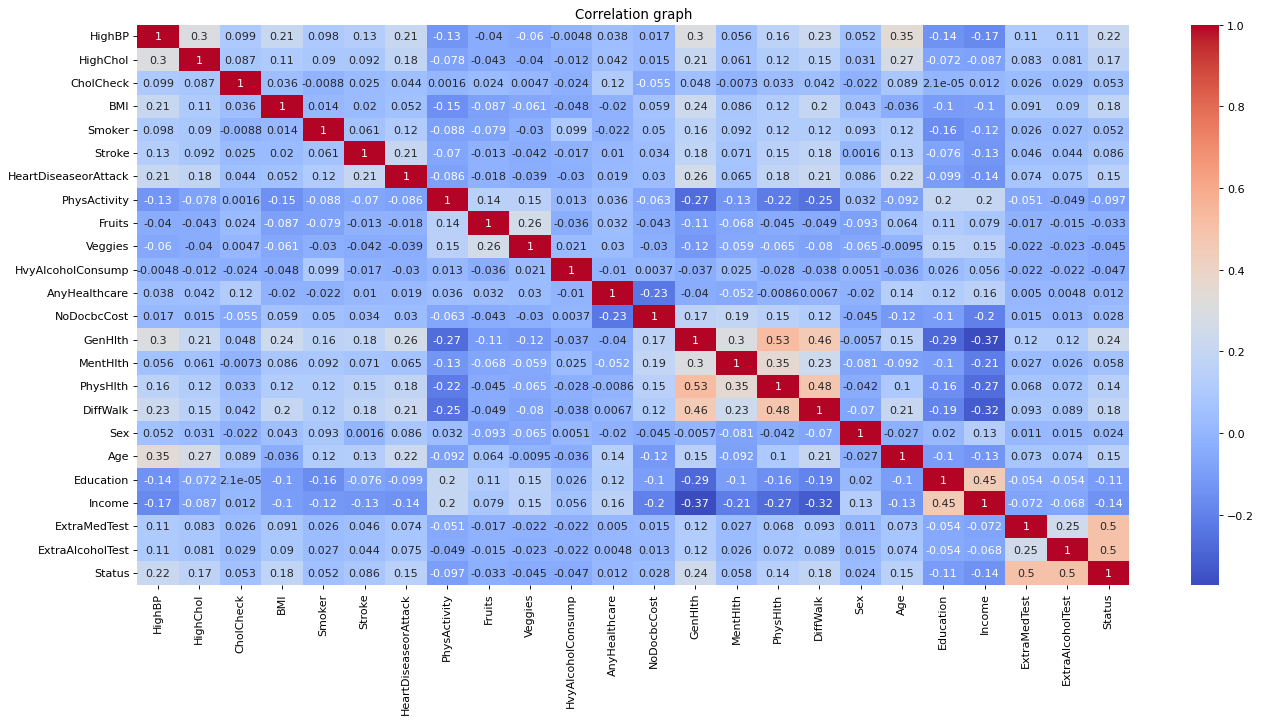

In [28]:
corr = health_data.corr()
fig = plt.figure(figsize=(20, 20), dpi=80)
ax1 = fig.add_subplot(211)
ax1.set_title("Correlation graph")
sns.heatmap(corr, annot=True, cmap="coolwarm")

- GenHlth and PhysHlth: 0.53
- GenHlth and DiffWalk: 0.46
- DiffWalk and PhysHlth: 0.48
- GenHlth and Income: -0.37
- Status and ExtraMedTest: 0.5
- Status and ExtraAlcoholTest: 0.5

- CholCheck, Smoker, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, Sex are low correlated with `Status`

In [35]:
# target variable
y = health_data.Status

feature_names = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'ExtraMedTest', 'ExtraAlcoholTest']

# feature_names = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
#        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
#        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
#        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# feature_names = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
#        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
#        'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']

# feature_names = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
#        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
#        'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 
#        'Age', 'ExtraMedTest', 'ExtraAlcoholTest']

# feature_names = ['HighBP', 'HighChol', 'BMI', 'Stroke',
#        'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth',
#        'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income',
#        'ExtraMedTest', 'ExtraAlcoholTest']

X = health_data[feature_names].copy()

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Break off validation set from training data
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

print(train_X.shape)
print(val_X.shape)

#specify the model. For model reproducibility, set a numeric value for random_state
model = RandomForestClassifier(random_state=1)
model_2 = DecisionTreeClassifier(random_state=1, max_leaf_nodes=50)  # Ít bị ảnh hưởng bởi outliers
model_3 = LogisticRegression(max_iter=1000)

# Fit the model
model.fit(train_X, train_y)
model_2.fit(train_X, train_y)
model_3.fit(train_X, train_y)
  
predictions = model.predict(val_X)
predictions_2 = model_2.predict(val_X)
predictions_3 = model_3.predict(val_X)

print("Accuracy score of model 1: ", accuracy_score(val_y, predictions))
print("Accuracy score of model 2: ", accuracy_score(val_y, predictions_2))
print("Accuracy score of model 3: ", accuracy_score(val_y, predictions_3))

(162355, 23)
(40589, 23)
Accuracy score of model 1:  0.9594225036339895
Accuracy score of model 2:  0.9596442385868093
Accuracy score of model 3:  0.9310650668900441


In [10]:
# import matplotlib.pyplot as plt

# # Mean Absolute Errors
# mae_values = [accuracy_score(val_y, predictions),
#               accuracy_score(val_y, predictions_2),
#               accuracy_score(val_y, predictions_3)]

# # Model names
# model_names = ['DecisionTreeRegressor',
#                'DecisionTreeClassifier',
#                'LogisticRegression']

# # Create bar plot
# plt.figure(figsize=(10, 6))
# plt.bar(model_names, mae_values, color=['blue', 'green', 'red'])
# plt.xlabel('Models')
# plt.ylabel('Accuracy score')
# plt.title('Accuracy score of Different Models')
# plt.xticks(rotation=45, ha='right')
# plt.show()



[[16656   123]
 [  709  2807]]


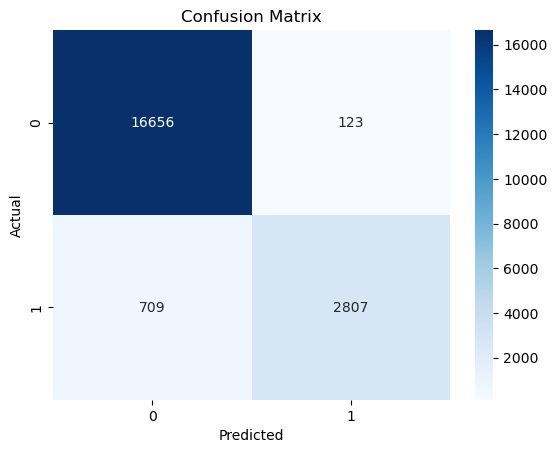

In [11]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(val_y, predictions_2)

print(conf_matrix)

# Plot confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['0', '1'], 
            yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
def get_accuracy_score(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    ac = accuracy_score(val_y, preds_val)
    return(ac)

# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 60, 70, 80, 90, 100, 500, 1000, 1200, 2000, 5000]:
    my_ac = get_accuracy_score(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Accuracy:  %f" %(max_leaf_nodes, my_ac))

Max leaf nodes: 5  		 Accuracy:  0.955654
Max leaf nodes: 50  		 Accuracy:  0.959005
Max leaf nodes: 60  		 Accuracy:  0.959005
Max leaf nodes: 70  		 Accuracy:  0.959103
Max leaf nodes: 80  		 Accuracy:  0.959202
Max leaf nodes: 90  		 Accuracy:  0.959300
Max leaf nodes: 100  		 Accuracy:  0.959054
Max leaf nodes: 500  		 Accuracy:  0.958216
Max leaf nodes: 1000  		 Accuracy:  0.957083
Max leaf nodes: 1200  		 Accuracy:  0.956295
Max leaf nodes: 2000  		 Accuracy:  0.955211
Max leaf nodes: 5000  		 Accuracy:  0.946834


> CÓ THỂ LÀM MODEL CHẠY CHUẨN HƠN CHO TESTING BẰNG CÁCH TRAIN 100% TRAIN DATA LUÔN!!!, KO CẦN CHỪA LẠI CHO VALIDATION!

You know the best tree size. If you were going to deploy this model in practice, you would make it even more accurate by using all of the data and keeping that tree size. That is, you don't need to hold out the validation data now that you've made all your modeling decisions.

In [25]:
health_data_test = pd.read_csv("data_test.csv", delimiter=",", index_col="Id")

health_data_test = health_data_test.drop("Status", axis=1)

health_data_test.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest
count,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,...,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000,50736.000000
mean,0.430207,0.423230,0.962729,28.392522,0.445305,0.039479,0.093366,0.757509,0.629789,0.811022,...,2.500867,3.135978,4.184583,0.166292,0.443531,8.010801,5.051187,6.046811,-10.972189,-11.429202
std,0.495110,0.494076,0.189428,6.592550,0.497004,0.194733,0.290947,0.428594,0.482866,0.391495,...,1.060819,7.354835,8.642537,0.372346,0.496806,3.064743,0.986477,2.075180,74.323238,74.525657
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-57.000000,-58.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,33.000000,32.000000
max,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000


In [26]:

health_data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50736 entries, 202944 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   HighBP                50736 non-null  int64
 1   HighChol              50736 non-null  int64
 2   CholCheck             50736 non-null  int64
 3   BMI                   50736 non-null  int64
 4   Smoker                50736 non-null  int64
 5   Stroke                50736 non-null  int64
 6   HeartDiseaseorAttack  50736 non-null  int64
 7   PhysActivity          50736 non-null  int64
 8   Fruits                50736 non-null  int64
 9   Veggies               50736 non-null  int64
 10  HvyAlcoholConsump     50736 non-null  int64
 11  AnyHealthcare         50736 non-null  int64
 12  NoDocbcCost           50736 non-null  int64
 13  GenHlth               50736 non-null  int64
 14  MentHlth              50736 non-null  int64
 15  PhysHlth              50736 non-null  int64
 16  Dif

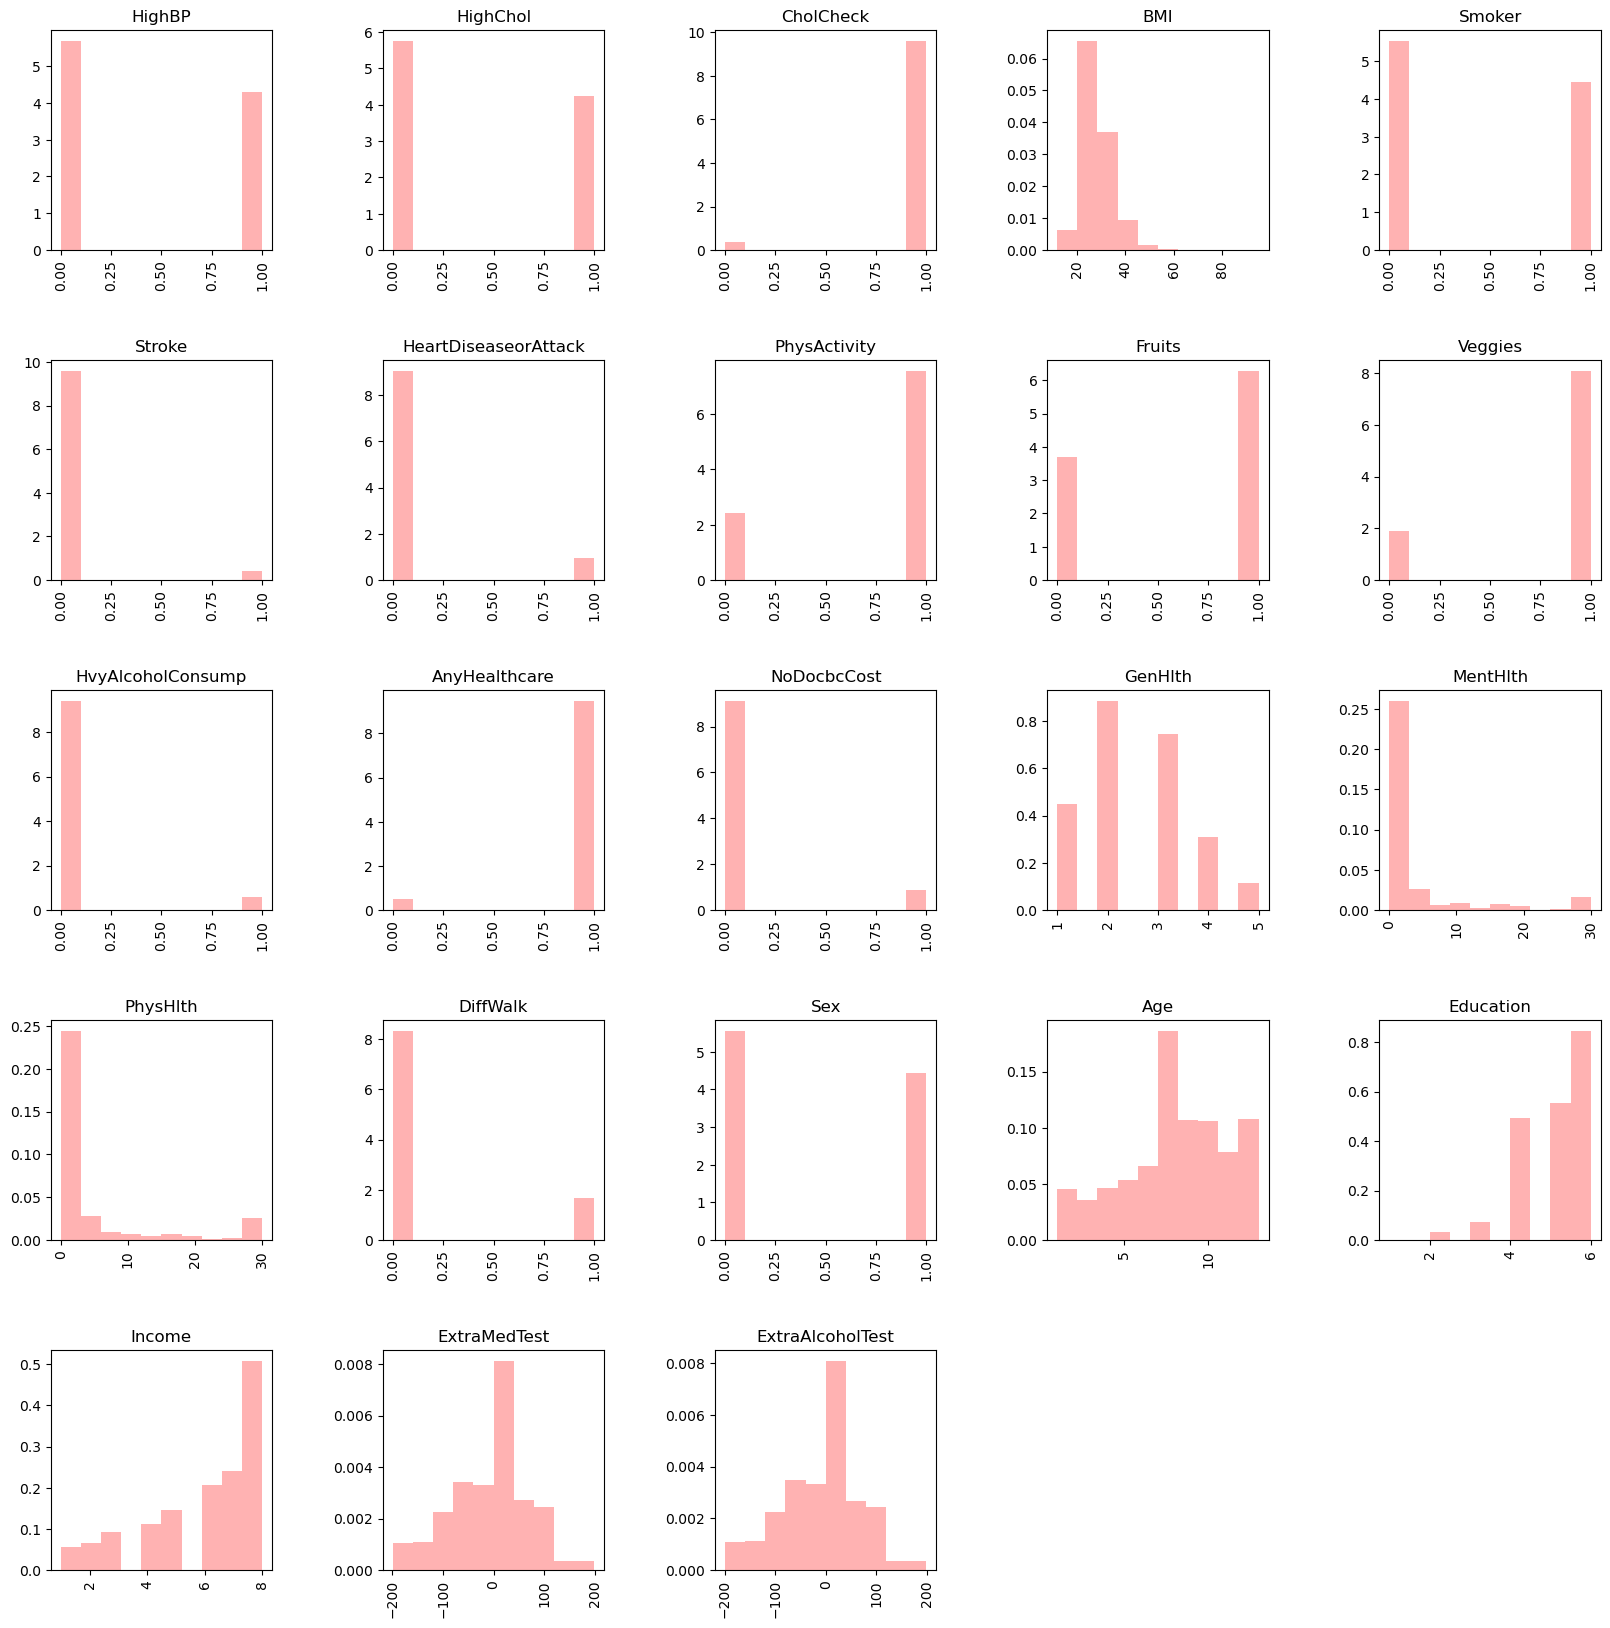

In [27]:
# create a figure to hold different subplots
plt.figure(figsize=(20,20))

# iterate through each column in health_data_test and plot a corresponding histogram
for i, col in enumerate(health_data_test.columns):
    plt.subplot(5,5,i+1)
    plt.hist(health_data_test[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

# adding space between each subplot
plt.subplots_adjust(wspace=0.5, hspace=0.5)



# X_test = health_data_test[feature_names].copy()

# test_prediction = final_model.predict(X_test)

# # Save predictions in format used for competition scoring
# output = pd.DataFrame({'Id': X_test.index,
#                        'Status': test_prediction})
# output.to_csv('submission.csv', index=False)

Note:
- Có thể bảo through out cái process này, t sẽ dùng random_state để đảm bảo các random sẽ giống nhau
- Xác định loại ML là supervised learning, cụ thể là binary classification với output là 0 hoặc 1
- Xem có features nào bị high corelation ko
- Feature scaling
- Feature Engineering: It's possible that the features you're using are not capturing all the relevant information. Try creating new features or transforming existing ones to better represent the underlying patterns in the data.
- Cross-Validation: Perform cross-validation to get a better estimate of the model's performance. This helps in assessing how well the model generalizes to unseen data.
- It's also worth noting that decision trees tend to perform well when the dataset has categorical variables with a large number of levels, as they can automatically handle such features without the need for one-hot encoding.
- Phải phân tích đề, chuẩn bị câu hỏi, để gặp thầy!
- Cẩn thận Underfit và Overfit
